<a href="https://colab.research.google.com/github/Sukhi02/aa/blob/master/Assignment_1_Sukhwinder_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1


Consider the dataset ‘noisy_data.csv’ and apply the following pre-processing techniques and obtain the clean dataset.

– Handling missing values by imputation (10 points)

– Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data (10 points)

– Apply encodings for categorical variable and scale the features (10 points)

In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/AIDI/0002/noisy_data.csv"
data = pd.read_csv(path)

print(data.describe())
# importing an array of features
x = data.iloc[:, :-1].values 
# importing an array of dependent variable
y = data.iloc[:, -1].values
print()
print(x)
print()
print(y)

             Age        Income
count   9.000000      9.000000
mean   43.777778  76533.333333
std     7.693793  14718.695594
min    32.000000  57600.000000
25%    40.000000  64800.000000
50%    43.000000  73200.000000
75%    49.000000  86400.000000
max    55.000000  99600.000000

[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 nan]
 ['India' 40.0 69600.0]
 ['Brazil' nan 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


Handling missing values by imputation (10 points) 

In [ ]:
from sklearn.impute import SimpleImputer
# To replace the missing value we create below object of SimpleImputer class
imputar = SimpleImputer(missing_values = np.nan, strategy = 'mean')
''' Using the fit method, we apply the `imputa` object on the matrix of our feature x.
The `fit()` method identifies the missing values and computes the mean of such feature a missing value is present.
'''
print("Prior to fill Missing values")
print(x)
print()
imputar.fit(x[:, 1:3])
# Repalcing the missing value using transform method
x[:, 1:3] = imputar.transform(x[:, 1:3])
print("After applying Impute() ")
print(x)

Prior to fill Missing values
[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 nan]
 ['India' 40.0 69600.0]
 ['Brazil' nan 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]

After applying Impute() 
[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 76533.33333333333]
 ['India' 40.0 69600.0]
 ['Brazil' 43.77777777777778 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]



Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data (10 points)

In [ ]:
def noraml_test(data):
  from scipy.stats import normaltest

  # normality test
  stat, p_value = normaltest(data)
  print('Statistics=%.3f, p=%.3f' % (stat, p_value))
  # interpret
  alpha = 0.05
  if p_value<=alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')
  print()


noraml_test(x[:,1])
noraml_test(x[:,2])

Statistics=0.038, p=0.981
Sample does not look Gaussian (reject H0)

Statistics=0.705, p=0.703
Sample does not look Gaussian (reject H0)



/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Apply encodings for categorical variable and scale the features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
print("Before Pre-processing")
print(x)
x = np.array(ct.fit_transform(x))
print()
print("After Transformation")
print(x)
print()
x = x[:,1:]
print("After Removing Dummy")
print(x)
print()
# define standard scaler
scaler = StandardScaler()
# transform data
x = scaler.fit_transform(x)
print("Cleaned Data")
print(x)

Before Pre-processing
[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 76533.33333333333]
 ['India' 40.0 69600.0]
 ['Brazil' 43.77777777777778 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]

After Transformation
[[0.0 1.0 0.0 49.0 86400.0]
 [1.0 0.0 0.0 32.0 57600.0]
 [0.0 0.0 1.0 35.0 64800.0]
 [1.0 0.0 0.0 43.0 73200.0]
 [0.0 0.0 1.0 45.0 76533.33333333333]
 [0.0 1.0 0.0 40.0 69600.0]
 [1.0 0.0 0.0 43.77777777777778 62400.0]
 [0.0 1.0 0.0 53.0 94800.0]
 [0.0 0.0 1.0 55.0 99600.0]
 [0.0 1.0 0.0 42.0 80400.0]]

After Removing Dummy
[[1.0 0.0 49.0 86400.0]
 [0.0 0.0 32.0 57600.0]
 [0.0 1.0 35.0 64800.0]
 [0.0 0.0 43.0 73200.0]
 [0.0 1.0 45.0 76533.33333333333]
 [1.0 0.0 40.0 69600.0]
 [0.0 0.0 43.77777777777778 62400.0]
 [1.0 0.0 53.0 94800.0]
 [0.0 1.0 55.0 99600.0]
 [1.0 0.0 42.0 80400.0]]

Cleaned Data
[[ 1.22474487 -0.65465367  0.75887436  0.74947325]
 [-0.81649658 -0.65465367 -1.71150388 -1

#Question 2

Consider the text present in the file ‘wiki.txt’ and Answer the following questions :

– Write a program to convert following text into tokens with two tokenization methods such as ‘RegexpTokenizer()’ and ‘word_tokenize()’ from NLTk library. (Note :The tokens should not have stop words and punctuation symbols. Feel free to decide about the correct list of stop words; e.g., negative words (don’t) could be important for you.
Execute both methods of tokenization along with your code of removing stop words and punctuation.) (10 points)

– Write a regular expression to extract all the year mentions in the ‘wiki.txt’ file. (10 points)

– State the differences observed in the output of tokenization met


In [ ]:
path = "/content/drive/MyDrive/AIDI/0002/wiki.txt"
f = open(path, 'r')
content = f.read()
f.close()
print(content)


The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks worlds"


– Write a program to convert following text into tokens with two tokenization methods such as ‘RegexpTokenizer()’ and ‘word_tokenize()’ from NLTk library. (Note :The tokens should not have stop words and punctuation symbols. Feel free to decide about the correct list of stop words; e.g., negative words (don’t) coul
d be important for you.
Execute both methods of tokenization along with your code of removing stop words and punctuation.) (10 points)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import stopwords


#remove stopwords
stop_words = set(stopwords.words('english'))
my_stopwords = "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","?"," ",".",","
stop_words.add(my_stopwords)
print(content)
text_tokens = word_tokenize(content)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
tokenizer = nltk.RegexpTokenizer(r"\w+")

new_words = tokenizer.tokenize(content)
print(content)

print()
number_of_words = len(content)
print("1. Initiaaly there are " +str(number_of_words)+" alphanumeric")
number_of_words = len(tokens_without_sw)
print("2. After processing there are " +str(number_of_words)+" alphanumeric remaining")
print("\n \n ")

capword_tokenizer = RegexpTokenizer('[A-Z]\w+')
print(capword_tokenizer.tokenize(content))
tokenizer = RegexpTokenizer('\s+', gaps=True)
print(tokenizer.tokenize(content))






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the la

– Write a regular expression to extract all the year mentions in the ‘wiki.txt’ file. (10 points)

In [ ]:
import re
listt = []
for line in re.findall("\d{3}[a-zA-Z0-9_]", content):
    listt.append(line)
    print(line)
print("Mentioned years in the wiki files are " + str(listt))

1950
1950
1954
1966
1980
1960
1964
1966
Mentioned years in the wiki files are ['1950', '1950', '1954', '1966', '1980', '1960', '1964', '1966']


– State the differences observed in the output of tokenization met


In [ ]:
number_of_words = len(content)
print("1. Initiaaly there are " +str(number_of_words)+" alphanumeric")
number_of_words = len(tokens_without_sw)
print("2. After processing there are " +str(number_of_words)+" alphanumeric remaining")

1. Initiaaly there are 1442 alphanumeric
2. After processing there are 179 alphanumeric remaining


#Question 3

Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/dansbecker/
melbourne-housing-snapshot/home) and answer the following questions :

– Apply the feature selection techniques over the melbourne-housing -dataset namely (20 points):

∗ Correlation

∗ Chi-Square

∗ Mutual-Information

∗ Random Forest feature importance

– Compare the importance of selected features using bar chart (10 points)

– Comment on the results obtained from various feature selection techniques and which is the best and worst feature selection selection technique on the given dataset (10 points).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
path = "/content/drive/MyDrive/AIDI/0002/melb_data.csv"
data = pd.read_csv(path)
data = data.dropna( )

## Visualisation

1. Visualising the relationship btween Suburb and prices.

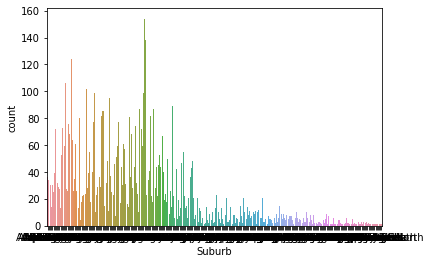

In [ ]:
sns.countplot(x=data["Suburb"], data=data["Price"])

Variable 2: Room vs Price

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


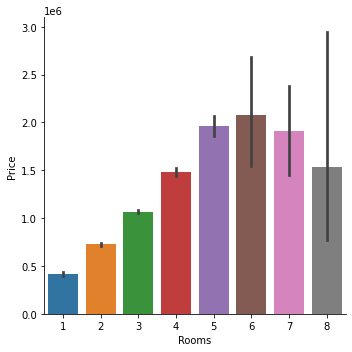

In [ ]:
#Price- Remove Rows containing missing values
df = data
df_nobed= data[data["Rooms"].notnull()]
sns.factorplot(x="Rooms", y="Price",  data=df_nobed, kind="bar")
#sns.factorplot(x="Bedroom2", y="Price",  data=df_nobed, kind="bar",ax = ax2)
plt.show()

Variable 3: Type vs Price

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

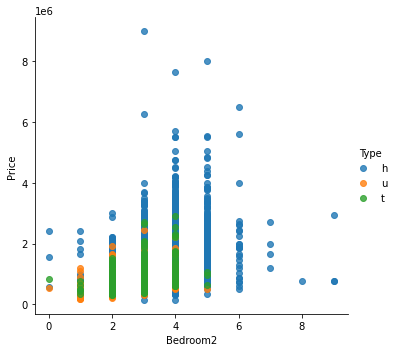

In [ ]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(0,2)

#facet = sns.lmplot(data=df, x='Rooms', y='Price', hue='Regionname', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=data, x='Bedroom2', y='Price', hue='Type', fit_reg=False, legend=True, legend_out=True)
fig.show()

df.loc[df.Bathroom.isnull(), 'Bathroom']  = df.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))
df.head()
df.loc[df.Car.isnull(), 'Car']  = df.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))
df.loc[df.Landsize.isnull(), 'Landsize']  = df.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))

#RegionName, Council Area, Property count- two rows which have all of these values as missing. No way to determine the values
df=df[df.Regionname.notnull()]

Variable 4: Method vs Price

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


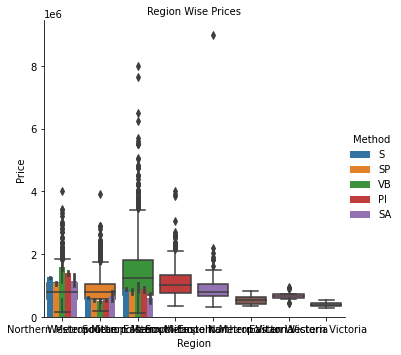

In [ ]:
sns.factorplot(x="Type", y="Price", hue="Method", data=df, kind="bar");
df.groupby('Regionname', as_index=False).agg({"Price": "mean"})
b=sns.boxplot(x="Regionname", y="Price", data=df, dodge=False);
b.axes.set_title("Region Wise Prices",fontsize=10)
b.set_xlabel("Region",fontsize=10)
b.set_ylabel("Price",fontsize=10)
b.tick_params(labelsize=10)

Variable 5: SellerG vs Car, and Room 

In [ ]:
df.groupby('Regionname')[['SellerG']].count()
df.groupby('Regionname', as_index=False).agg({"Car": "mean","Price": "mean","Rooms": "mean"})
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(['Regionname']).agg({'Rooms':"mean",      # find the sum of the durations for each group
                                     'SellerG': "count" # find the number of network type entries
                                     })    # get the first date per group

,Rooms,SellerG
Regionname,,
Eastern Metropolitan,3.327496,571
Eastern Victoria,3.478261,23
Northern Metropolitan,2.714132,1854
Northern Victoria,3.473684,19
South-Eastern Metropolitan,3.369427,157
Southern Metropolitan,2.897969,2166
Western Metropolitan,3.038075,1392
Western Victoria,3.571429,14


Variable 6: Bedroom2 vs Price

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


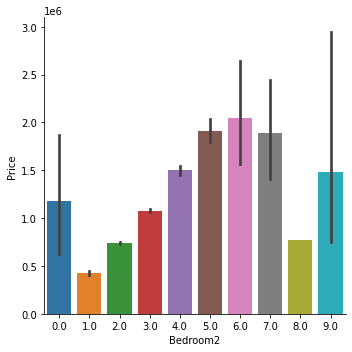

In [ ]:
#Price- Remove Rows containing missing values
df = data
df_nobed= data[data["Bedroom2"].notnull()]
sns.factorplot(x="Bedroom2", y="Price",  data=df_nobed, kind="bar")
plt.show()

Variable 7: Bathroom vs house

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


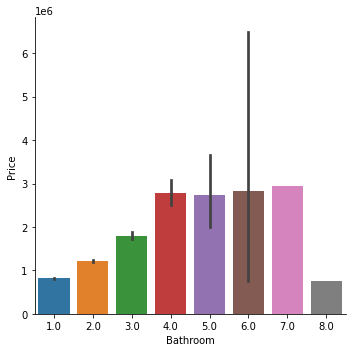

In [ ]:
df_b=df[df.Bathroom.notnull()]
df['Bathroom'] = df['Bathroom'].apply(lambda x: round(x))
df['Car'] = df['Car'].apply(lambda x: round(x))
sns.factorplot(x="Bathroom", y="Price",  data=df_nobed, kind="bar")
plt.show()

Relationship between BuildingArea, Longtitude, Year Built, Lattitude, Bedroom2, Address, Postcode

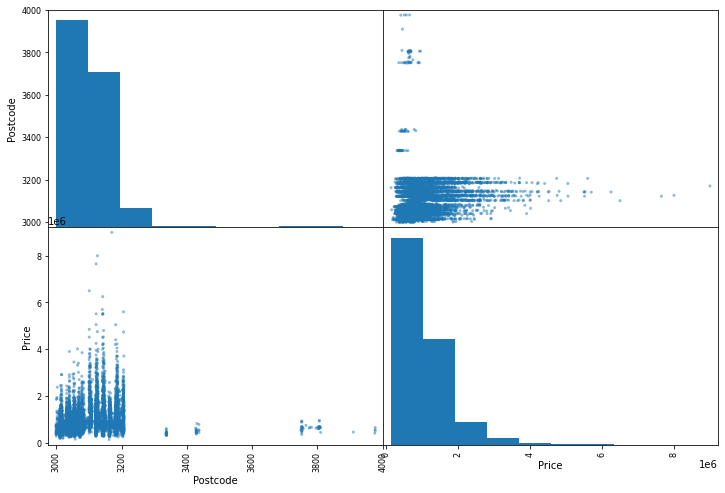

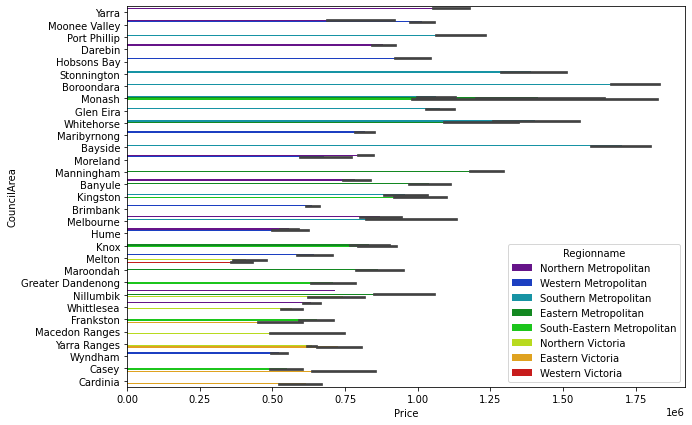

In [ ]:
from pandas.plotting import scatter_matrix
attributes = [ "Postcode", "Price"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')
plt.show()

# Get Months out of Dates
df['Date'] = pd.to_datetime(df['Date'])
column = df['Date']
fearure_col = pd.DataFrame({"month":column.dt.month})
df =  pd.concat([df,fearure_col], axis = 1)

len(df.Suburb.unique())

df = df.drop(['BuildingArea','Longtitude','YearBuilt','Lattitude','Bedroom2','Address','Postcode'], axis = 1)
df.to_csv('data_feature.csv', encoding='utf-8', index=False)
f, ax = plt.subplots(figsize=(10, 7))
df_nobed= data[data["Rooms"].notnull()]
data_priced = data[data.Price.notnull()].drop('Address', axis = 1)
sns.barplot(x ='Price',y="CouncilArea", hue="Regionname", data=data_priced, palette="nipy_spectral");

Council area vs Prices

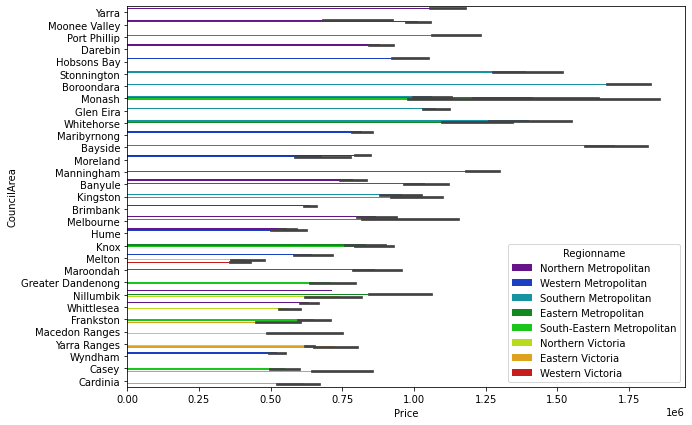

In [ ]:
data_priced = data[data.Price.notnull()].drop('Address', axis = 1)
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x ='Price',y="CouncilArea", hue="Regionname", data=data_priced, palette="nipy_spectral");

##– Apply the feature selection techniques over the melbourne-housing -dataset namely (20 points): 

∗ Correlation 

∗ Chi-Square 

∗ Mutual-Information 

∗ Random Forest feature importance


                  Rooms     Price  ...  Longtitude  Propertycount
Rooms          1.000000  0.533505  ...    0.088031      -0.111422
Price          0.533505  1.000000  ...    0.211760      -0.046410
Distance       0.283885 -0.148867  ...    0.221861      -0.083969
Postcode       0.051237  0.125539  ...    0.471305       0.064534
Bedroom2       0.951793  0.514561  ...    0.085895      -0.109401
Bathroom       0.613853  0.503922  ...    0.116103      -0.067126
Car            0.422526  0.261507  ...    0.054699      -0.046487
Landsize       0.098755  0.081419  ...    0.032918      -0.017784
BuildingArea   0.608215  0.530574  ...    0.103613      -0.066144
YearBuilt     -0.068122 -0.304633  ...   -0.002114      -0.000797
Lattitude      0.016049 -0.213574  ...   -0.357988       0.057225
Longtitude     0.088031  0.211760  ...    1.000000       0.073856
Propertycount -0.111422 -0.046410  ...    0.073856       1.000000

[13 rows x 13 columns]


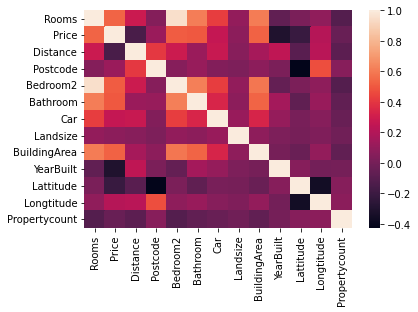

In [ ]:
#Correlation Matrix
corr_matrix = data.corr()
print(corr_matrix)

# plot the heatmap
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

 Chi-Square 

In [ ]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_test(data):
	stat, p, dof, expected = chi2_contingency(data_t)
	
	prob = 0.95
	critical = chi2.ppf(prob, dof)
	print('(CHI SQUARE) probability=%.3f, critical=%.3f, stat=%.3f, p_value=%.3f' % (prob, critical, stat, p))
	if p >= 0.05:
		print('Dependent (reject H0)')
	else:
		print('Independent (fail to reject H0)')
	print()

	return p


data_t = data["Rooms"], data["Price"]
print("Rooms vs Price        >> :" +str(chi_test(data_t)))

data_t = data["Distance"], data["Price"]
print("Distance vs Price     >> :"  +str(chi_test(data_t)))


data_t = data["Bedroom2"], data["Price"]
print("Bedroom2 vs Price     >> :"  +str(chi_test(data_t)))

data_t = data["Bathroom"], data["Price"]
print("Bathroom vs Price     >> :"  +str(chi_test(data_t)))

data_t = data["Car"], data["Price"]
print("Car vs Price          >> :"  +str(chi_test(data_t)))

data_t = data["Landsize"], data["Price"]
print("Landsize vs Price     >> :"  +str(chi_test(data_t)))

data_t = data["BuildingArea"], data["Price"]
print("BuildingArea vs Price >> :"  +str(chi_test(data_t)))

data_t = data["YearBuilt"], data["Price"]
print("YearBuilt             >> :"  +str(chi_test(data_t)))

data_t = data["Propertycount"], data["Price"]
print("Property vs Price     >> :"  +str(chi_test(data_t)))



(CHI SQUARE) probability=0.950, critical=6379.219, stat=4078.109, p_value=1.000
Dependent (reject H0)

Rooms vs Price        >> :1.0
(CHI SQUARE) probability=0.950, critical=6379.219, stat=58118.902, p_value=0.000
Independent (fail to reject H0)

Distance vs Price     >> :0.0
(CHI SQUARE) probability=0.950, critical=6379.219, stat=4189.713, p_value=1.000
Dependent (reject H0)

Bedroom2 vs Price     >> :1.0
(CHI SQUARE) probability=0.950, critical=6379.219, stat=2716.760, p_value=1.000
Dependent (reject H0)

Bathroom vs Price     >> :1.0
(CHI SQUARE) probability=0.950, critical=6379.219, stat=5195.773, p_value=1.000
Dependent (reject H0)

Car vs Price          >> :1.0
(CHI SQUARE) probability=0.950, critical=6379.219, stat=18649397.647, p_value=0.000
Independent (fail to reject H0)

Landsize vs Price     >> :0.0
(CHI SQUARE) probability=0.950, critical=6379.219, stat=279405.351, p_value=0.000
Independent (fail to reject H0)

BuildingArea vs Price >> :0.0
(CHI SQUARE) probability=0.950, 

Mutual-Information 

In [ ]:
print(" mutual_info_regression")
from sklearn.feature_selection import mutual_info_regression as mr
print("Rooms vs Price        >> :" +str(mr( data[["Rooms"]], data["Price"])))
print("Distance vs Price     >> :" +str(mr( data[["Distance"]], data["Price"])))
print("Bedroom2 vs Price     >> :" +str(mr( data[["Bedroom2"]], data["Price"])))
print("Bathroom vs Price     >> :" +str(mr( data[["Bathroom"]], data["Price"])))
print("Car vs Price          >> :" +str(mr( data[["Car"]], data["Price"])))
print("Landsize vs Price     >> :" +str(mr( data[["Landsize"]], data["Price"])))
print("BuildingArea vs Price >> :" +str(mr( data[["BuildingArea"]], data["Price"])))
print("YearBuilt             >> :" +str(mr( data[["YearBuilt"]], data["Price"])))
print("Property vs Price     >> :" +str(mr( data[["Propertycount"]], data["Price"])))

 mutual_info_regression
Rooms vs Price        >> :[0.25449646]
Distance vs Price     >> :[0.17440564]
Bedroom2 vs Price     >> :[0.24525011]
Bathroom vs Price     >> :[0.16992899]
Car vs Price          >> :[0.10202878]
Landsize vs Price     >> :[0.16530932]
BuildingArea vs Price >> :[0.40087434]
YearBuilt             >> :[0.15922362]
Property vs Price     >> :[0.18332358]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "/content/drive/MyDrive/AIDI/0002/melb_data.csv"

"""3.  Creating Data Frames

"""
data = pd.read_csv(path)

# Creating Data Frames
X_d = data.iloc[:, :]
X = data.iloc[:, :].values
X = np.delete(X, 3, 1) 
y = data.iloc[:, 3].values


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X[:,1] = labelencoder.fit_transform(X[:,1])
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,4] = labelencoder.fit_transform(X[:,4])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,6] = labelencoder.fit_transform(X[:,6])
X[:,7] = labelencoder.fit_transform(X[:,7])


#0 Room = 8
#1 Type = 3
#2 Method = 5
#4 Bedroom2 = 10
#5 Bathroom = 8
#6 Car = 11
#8 Regionname = 8


# Multiple categorical columns
categorical_cols = ['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car',  'Regionname']
X = pd.get_dummies(data, columns=categorical_cols)
df.to_csv("/content/drive/MyDrive/AIDI/0002/data_regresson.csv")

Random Forest feature importance

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AIDI/0002/data_regression.csv")
df.describe()


,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,month,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
count,27174.000000,2.717400e+04,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.00000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000
mean,2.992051,1.050786e+06,11.274292,1.507691,1.697395,573.627197,-37.807819,144.997731,7575.439538,6.959483,0.678001,0.105174,0.216825,0.119673,0.642600,0.006955,0.132222,0.098550,0.051225,0.048245,0.092736,0.050269,0.000957,0.005042,0.086443,0.008427,0.060462,0.007691,0.029403,0.038125,0.027011,0.010562,0.001435,0.030986,0.044933,0.013064,0.055273,0.008942,0.000405,0.037057,0.058291,0.000147,0.065872,0.00287,0.035033,0.032531,0.016008,0.026091,0.018106,0.033782,0.002576,0.120336,0.006072,0.287039,0.006109,0.049275,0.313682,0.213991,0.003496
std,0.954765,6.421327e+05,6.791209,0.677807,0.894926,3057.530982,0.091094,0.118265,4494.607718,3.018975,0.467251,0.306783,0.412090,0.324585,0.479243,0.083109,0.338738,0.298062,0.220461,0.214287,0.290067,0.218503,0.030918,0.070826,0.281022,0.091414,0.238346,0.087363,0.168937,0.191501,0.162119,0.102227,0.037857,0.173282,0.207160,0.113551,0.228517,0.094142,0.020116,0.188906,0.234297,0.012132,0.248062,0.05350,0.183868,0.177409,0.125508,0.159409,0.133336,0.180672,0.050690,0.325360,0.077687,0.452388,0.077921,0.216446,0.463997,0.410128,0.059025
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.350000e+05,6

– Compare the importance of selected features using bar chart (10 points)

RMSE: 308180.0690556184


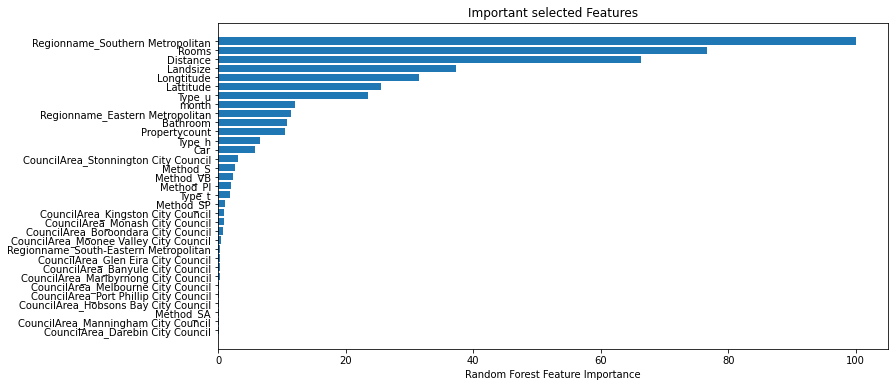

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
#%matplotlib inline 
#!pip install tabulate
df=pd.read_csv("/content/drive/MyDrive/AIDI/0002/data_regression.csv")
df.describe()

X = df.drop(['Price'], axis = 1)
y= df.Price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

predictions_2 =rf.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))

feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos[25:], feature_importance[sorted_idx][25:], align='center')
plt.yticks(pos[25:], X.columns[sorted_idx][25:])
plt.xlabel('Random Forest Feature Importance')
plt.title('Important selected Features')
plt.show()


– Comment on the results obtained from various feature selection techniques and which is the best and worst feature selection selection technique on the given dataset (10 points).

In the experiment, we performed multiple types of feature selection techniques. These techniques are used to extract the validated features. Initially, we have to view the patterns of the acquired data. We can use the plots and descriptions of the data and view the data. Here, we use the correlation matrix as the first feature extraction method. It reveals that the price, year, longitude, and latitude are less co-related while Rooms and Bedroom2 are highly correlated. The less co-related are dropped in the Featured data, and the highly correlated features are preferred as a featured matrix. 
In the following method, we have a score of the Chi-Square. In the method, we have to validate the variables with the assumption of the hypothesis. If the variable successfully qualifies the p-value test, we can consider the feature else can reject that feature.
Apart from these two methods, we can measure the mutual dependence between variables such as Bedroom and Prices. Mutual information is simply a measurement of the dependence between random variables. So, in our experiment, we have variables that are non-negative value or equal to zero are independent as featured variables such as Bathroom and Price have an information gain of 0.17323631.

Random Forest-based feature importance is computing the mean and standard deviation of the variables. The feature_importances_ of in Scikit-Learn is used to perform the logic. In our experiment, it can be seen that Room Distance, Landsize, and others are the essential variables. So, we will consider these variables for the experimentation. 
Thus, we have the following columns as a final featured matrix.

1. Rooms
2. Price
3. Distance
4. Bathroom
5. Car
6. Land
7. size
8. Lattitude
9. Longtitude
10. Property
11. count
12. month
13. Type
14. Method
15. CouncilArea
16. Metropolitan